QUESTION-1

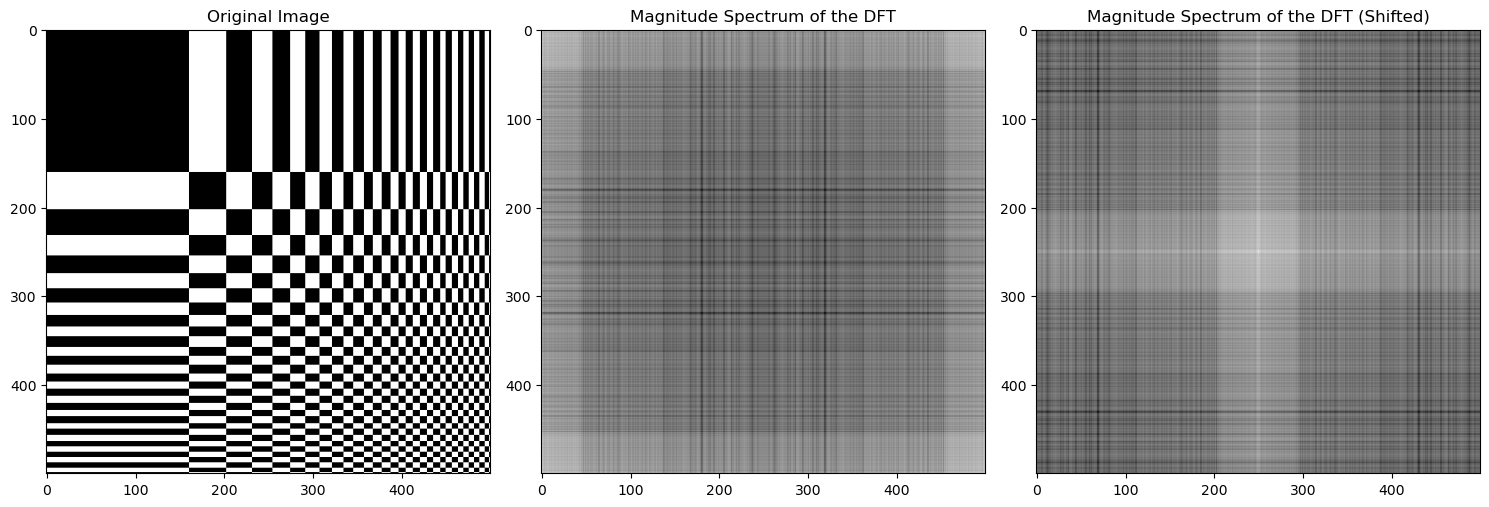

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('dynamicCheckerBoard.png', cv2.IMREAD_GRAYSCALE)
# Preprocess by scaling each pixel

# Compute DFT and magnitude spectrum for the original image
dft_image = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft_image)
magnitude_spectrum_o = np.log(np.abs(dft_image))
magnitude_spectrum_shifted_o = np.log(np.abs(dft_shifted))


# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

# Plot the original image
axes[ 0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

# Plot the magnitude spectrum of the DFT (original image)
axes[1].imshow(magnitude_spectrum_o, cmap='gray')
axes[1].set_title('Magnitude Spectrum of the DFT')

# Plot the magnitude spectrum of the DFT (Shifted, original image)
axes[2].imshow(magnitude_spectrum_shifted_o, cmap='gray')
axes[2].set_title('Magnitude Spectrum of the DFT (Shifted)')
# Adjust layout
plt.tight_layout()
plt.show()

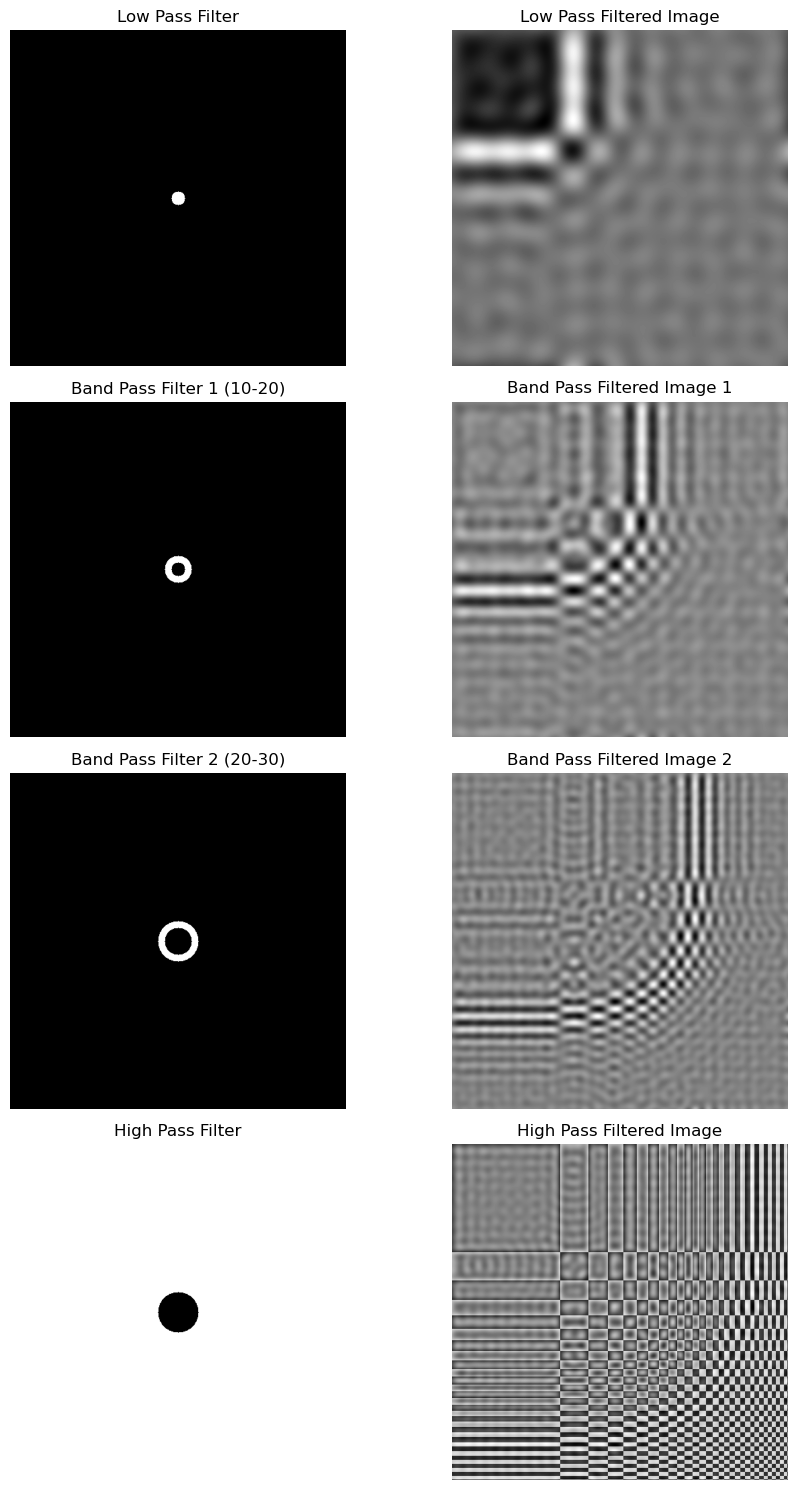

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load image
img = cv2.imread('dynamicCheckerBoard.png', cv2.IMREAD_GRAYSCALE)

# Get image dimensions
P, Q = img.shape

# Helper function to compute the distance matrix
def compute_distance_matrix(P, Q):
    u = np.arange(0, P)
    v = np.arange(0, Q)
    U, V = np.meshgrid(u, v)
    D = np.sqrt((U - P//2)**2 + (V - Q//2)**2)
    return D

# Function to create Ideal Low Pass Filter (ILPF)
def ilpf(D0, P, Q):
    D = compute_distance_matrix(P, Q)
    H = np.zeros((P, Q))
    H[D <= D0] = 1
    return H

# Function to create Ideal High Pass Filter (IHPF)
def ihpf(D0, P, Q):
    return 1 - ilpf(D0, P, Q)

# Function to create Ideal Band Pass Filter (IBPF)
def ibpf(Dl, Dh, P, Q):
    return ilpf(Dh, P, Q) * ihpf(Dl, P, Q)

# Function to apply the filter in the frequency domain
def apply_filter(img, H):
    # Compute DFT and shift the zero frequency component to the center
    F = np.fft.fftshift(np.fft.fft2(img))
    # Apply filter
    F_filtered = F * H
    # Inverse DFT
    img_filtered = np.fft.ifft2(np.fft.ifftshift(F_filtered))
    # Take magnitude real part
    img_filtered_real = np.real(img_filtered)
    # Take imagine part
    # img_filtered_imag = np.imag(img_filtered)
    
    return img_filtered_real
# Parameters
D0 = 10
Dl1, Dh1 = 10, 20
Dl2, Dh2 = 20, 30
D0_hp = 30

# Create filters
H_low = ilpf(D0, P, Q)
H_band1 = ibpf(Dl1, Dh1, P, Q)
H_band2 = ibpf(Dl2, Dh2, P, Q)
H_high = ihpf(D0_hp, P, Q)

# Apply filters
filtered_low = apply_filter(img, H_low)
filtered_band1 = apply_filter(img, H_band1)
filtered_band2 = apply_filter(img, H_band2)
filtered_high = apply_filter(img, H_high)

# Plotting
plt.figure(figsize=(10, 15))

# First row: Low Pass Filter and its image
plt.subplot(4, 2, 1)
plt.imshow(H_low, cmap='gray')
plt.title('Low Pass Filter')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.imshow(filtered_low, cmap='gray')
plt.title('Low Pass Filtered Image')
plt.axis('off')

# Second row: Band Pass Filter 1 and its image
plt.subplot(4, 2, 3)
plt.imshow(H_band1, cmap='gray')
plt.title('Band Pass Filter 1 (10-20)')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.imshow(filtered_band1, cmap='gray')
plt.title('Band Pass Filtered Image 1')
plt.axis('off')

# Third row: Band Pass Filter 2 and its image
plt.subplot(4, 2, 5)
plt.imshow(H_band2, cmap='gray')
plt.title('Band Pass Filter 2 (20-30)')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.imshow(filtered_band2, cmap='gray')
plt.title('Band Pass Filtered Image 2')
plt.axis('off')

# Fourth row: High Pass Filter and its image
plt.subplot(4, 2, 7)
plt.imshow(H_high, cmap='gray')
plt.title('High Pass Filter')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.imshow(filtered_high, cmap='gray')
plt.title('High Pass Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

QUESTION-2

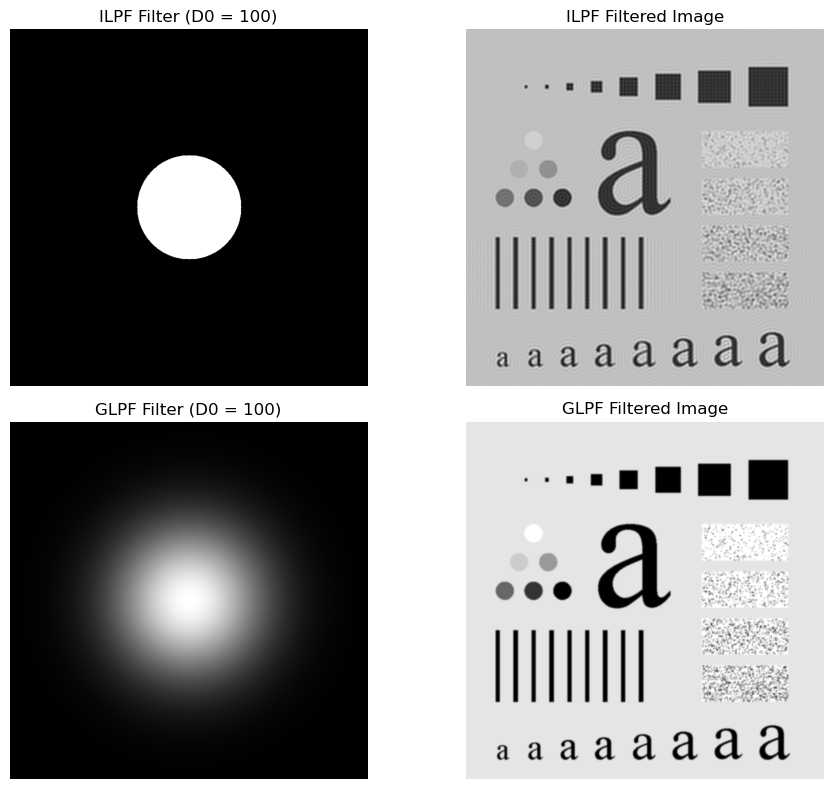

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('characters.tif', cv2.IMREAD_GRAYSCALE)

# Get image dimensions
P, Q = img.shape

# Helper function to compute the distance matrix
def compute_distance_matrix(P, Q):
    u = np.arange(0, P)
    v = np.arange(0, Q)
    U, V = np.meshgrid(u, v)
    D = np.sqrt((U - P//2)**2 + (V - Q//2)**2)
    return D

# Ideal Low Pass Filter (ILPF)
def ilpf(D0, P, Q):
    D = compute_distance_matrix(P, Q)
    H = np.zeros((P, Q))
    H[D <= D0] = 1
    return H

# Gaussian Low Pass Filter (GLPF)
def glpf(D0, P, Q):
    D = compute_distance_matrix(P, Q)
    H = np.exp(-(D**2) / (2 * (D0**2)))
    return H

# Function to apply a filter in the frequency domain
def apply_filter(img, H):
    # Compute DFT and shift the zero frequency component to the center
    F = np.fft.fftshift(np.fft.fft2(img))
    # Apply filter
    F_filtered = F * H
    # Inverse DFT
    img_filtered = np.fft.ifft2(np.fft.ifftshift(F_filtered))
    # Take the real part of the inverse FFT result
    img_filtered_real = np.real(img_filtered)
    return img_filtered_real

# Filter parameters
D0 = 100

# Create the filters
H_ilpf = ilpf(D0, P, Q)
H_glpf = glpf(D0, P, Q)

# Apply the filters
filtered_ilpf = apply_filter(img, H_ilpf)
filtered_glpf = apply_filter(img, H_glpf)

# Plotting
plt.figure(figsize=(10, 8))



# ILPF Filter and Filtered Image
plt.subplot(2, 2, 1)
plt.imshow(H_ilpf, cmap='gray')
plt.title(f'ILPF Filter (D0 = {D0})')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(filtered_ilpf, cmap='gray')
plt.title('ILPF Filtered Image')
plt.axis('off')

# GLPF Filter and Filtered Image
plt.subplot(2, 2, 3)
plt.imshow(H_glpf, cmap='gray')
plt.title(f'GLPF Filter (D0 = {D0})')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(filtered_glpf, cmap='gray')
plt.title('GLPF Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
